# Предсказание коэффициента восстановления золота из золотосодержащей руды

В качестве заказчика проекта выступает злотодобывающая компания. Коллеги из компании «Цифра» предоставили сырые данные (их просто выгрузили из хранилища) для разработки модели для предсказания коэффициента восстановления золота из золотосодержащей руды.

Основная задача - подготовить прототип модели машинного обучения для компании «Цифра». Компания разрабатывает решения для эффективной работы промышленных предприятий.
<br>Модель должна предсказать **коэффициент восстановления золота из золотосодержащей руды**. В вашем распоряжении данные с
параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### План проекта

<br>[1. Загрузка данных, изучение общей информации и подготовка данных](#step1)
    <br>[1.1 Загрузка данных, изучение общей информации](#step2)
    <br>[1.2 Проверка расчета эффективности обогащения](#step3)
    <br>[1.3 Анализ признаков](#step4)
    <br>[1.4 Предобработка данных](#step5)
    <br>[1.5 Вывод к этапу 1](#step6)
<br>[2. Анализ данных](#step7)
    <br>[2.1 Анализ концентрации металлов на различных этапах очистки](#step8)
    <br>[2.2 Анализ распределения размеров гранул сырья](#step9)
    <br>[2.3 Анализ суммарной концентрации веществ на разных этапах очистки](#step10)
    <br>[2.4 Вывод к этапу 2](#step11)
<br>[3. Построение модели и определение метрик качества](#step12)
    <br>[3.1 Подготовка признаков и целевых признаков для обучения моделей](#step13)
    <br>[3.2 Обучение моделей и оценка их качества кросс-валидацией](#step14)
    <br>[3.3 Проверка моделей на адекватность](#step15)
    <br>[3.4 Расчет итоговой метрики sMAPE](#step16)
    <br>[3.5 Вывод к этапу 3](#step17)
<br>[4. Общий вывод](#step18)

## 1. Загрузка данных, изучение общей информации и подготовка данных<a id='step1'></a>

Прежде чем начать начать работу над проектом выполним подготовительные шаги, а именно импортируем нужные на данном этапе библиотеки.

In [1]:
import pandas as pd #Импрортирую библиотеку Pandas
%matplotlib inline
import matplotlib.pyplot as plt #Импортирую библиотеку matplotlib
import seaborn as sns #Импортирую библиотеку seaborn
import numpy as np #Импортирую библиотеку numpy

### 1.1 Загрузка данных, изучение общей информации<a id='step2'></a> 

Теперь читаем .csv файлы и знакомимся с данными.

In [2]:
#Читаю csv файлы с данными
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#Получаю информацию о датасетах и печатаю первые пять строк из каждого
train.info()
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.info()
display(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.info()
display(full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Промежуточный вывод

Для анализа данных и построения модели предоставлены 3 датасета, отражающие показатели качества очистки сырья в виде золотоносной руды и некоторые характеристики работы технологического оборудования. Датасеты обозначены переменными **full, train, test**. Датасет **full** состоит из 87 столбцов с данными и 22716 строк, датасет **train** состоит из 87 столбцов с данными и 16859 строк, датасет **test** состоит из 53 столбцов с данными и 5855 строк. Во всех датасетах имеются пропуски, которые вероятнее всего вызваны неисправностями контролирующих датчиков или же простоями технологического оборудования. 

### Описание технологического процесса
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
<br>Опишем каждую стадию:
#### 1. Флотация
<br>Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов. На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
#### 2. Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

### Описание данных
<br>Технологический процесс определяют следующие показатели:
<br>● Rougher feed — исходное сырье
<br>● Rougher additions (или reagent additions ) — флотационные реагенты: Xanthate, Sulphate, Depressant
<br>● Xanthate ** — ксантогенат (промотер, или активатор флотации);
<br>● Sulphate — сульфат (на данном производстве сульфид натрия);
<br>● Depressant — депрессант (силикат натрия).
<br>● Rougher process (англ. «грубый процесс») — флотация
<br>● Rougher tails — отвальные хвосты
<br>● Float banks — флотационная установка
<br>● Cleaner process — очистка
<br>● Rougher Au — черновой концентрат золота
<br>● Final Au — финальный концентрат золота
<br>Параметры этапов:
<br>● air amount — объём воздуха
<br>● fluid levels — уровень жидкости
<br>● feed size — размер гранул сырья
<br>● feed rate — скорость подачи

### Наименование признаков
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag
Возможные значения для блока [этап] :
<br>● rougher — флотация
<br>● primary_cleaner — первичная очистка
<br>● secondary_cleaner — вторичная очистка
<br>● final — финальные характеристики
<br>Возможные значения для блока [тип_параметра] :
<br>● input — параметры сырья
<br>● output — параметры продукта
<br>● state — параметры, характеризующие текущее состояние этапа
<br>● calculation — расчётные характеристики

### 1.2 Проверка расчета эффективности обогащения<a id='step3'></a> 

<br>Эффективность обогащения рассчитывается по формуле
<br>$ Recovery = C*(F-T)/F*(C-T) $
<br>где:
<br>● C — доля золота в концентрате после флотации/очистки;
<br>● F — доля золота в сырье/концентрате до флотации/очистки;
<br>● T — доля золота в отвальных хвостах после флотации/очистки.

<br>Пропуски данных в датасете **train** не позволяют произвести корректный расчет показателя **Recovery**. Попытки заполнения пропусков средними, а также соседними значениями не дали положительных результатов, а рассчетные значения показателя **Recovery** получались в диапазоне **(-inf; inf)**. Поэтому для корректного расчета показателя **MAE** между *'rougher.output.recovery'* и значениями рассчитанными по формуле удалим пропуски в датасете **train**.

In [6]:
#Удаляю пропуски в датасете train
train = train.dropna()

In [7]:
#Добавляю расчетный столбец MAE
train['rougher.output.recovery.check'] = 100 * train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])/(train['rougher.input.feed_au']*(train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  11017 non-null object
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant             

In [8]:
#Из библиотеки sklearn импортирую метрику MAE и рассчитываю ее
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(train['rougher.output.recovery'], train['rougher.output.recovery.check']))

1.1411121561045159e-14


### Промежуточный вывод
Не трудно видеть, что MAE между исходным и и рассчетными показателями является крайне-малой величиной **1.14*10^(-14)**. Следовательно можно сделать вывод, о том, что исходные показатели в столлбце *'rougher.output.recovery'* рассчитаны верно.

### 1.3 Анализ признаков<a id='step4'></a>

Для создания общей картины данных, определим признаки не попавшие в тестовую выборку.

In [9]:
#Получаю список признаков, не попавших в тестовую выборку
test_absent_features = []
for i in list(train.columns):
    if i not in list(test.columns):
        test_absent_features.append(i)
        
print(test_absent_features)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

### Промежуточный вывод
Полученный в предыдущей ячейке список содержит признаки, не попавшие в тестовую выборку. В основном это признаки, определяющие характеристики концентрата и отвальных хвостов после каждого из этапов очистки, а также расчетные количества компанентов, добавляемых в концентрат на этапах очистки, все данные относятся к типу *float*. Все эти признаки определяются на протяжении всего цикла обогащения золотоносной руды и зависят от входных параметров. Целевые признаки в тестовой выборке отсутствуют.

На следующих этапах мы определимся с признаками, которые будем использовать для обучения моделей.

### 1.4 Предобработка данных<a id='step5'></a>

По ходу решения задачи нам будет необходимо проводить операции по "склеиванию таблиц" методом *.merge()*. Поэтому данные в столбце *'date* переведем в тип datetime.

In [10]:
#Перевожу данные в столбце 'date' в формат datetime
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')

Наиболее очевидной проблемой в полученх данных является достаточно большое количество пропусков. С большой долей вероятности, пропуски обусловлены сбоями системы мониторинга технологической линии, например, выходами из строя датчиков, технологическими переключениями, нештатными ситуациями и т.д. Заполнение пропусков необоснованными данными может привести к ухудшению качества работы модели. В связи с этим пропущенные данные следует удалить.

In [11]:
full = full.dropna()
test = test.dropna()

full.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  16094 non-null datetime64[ns]
final.output.concentrate_ag                           16094 non-null float64
final.output.concentrate_pb                           16094 non-null float64
final.output.concentrate_sol                          16094 non-null float64
final.output.concentrate_au                           16094 non-null float64
final.output.recovery                                 16094 non-null float64
final.output.tail_ag                                  16094 non-null float64
final.output.tail_pb                                  16094 non-null float64
final.output.tail_sol                                 16094 non-null float64
final.output.tail_au                                  16094 non-null float64
primary_cleaner.input.sulfate                         16094 non-null float64
primary_cleaner.input.depressant     

### Промежуточный вывод
В качестве предобработки данных применено изменение формата данных в столце *'date'* и удаление пропусков во всех трех датасетах.

### 1.5 Вывод к этапу 1<a id='step6'></a>
На этом этапе проедена загрузка данных, изучение общей информации и подготовка данных.
<br>Для анализа данных и построения модели предоставлены 3 датасета, отражающие показатели качества очистки сырья в виде золотоносной руды и некоторые характеристики работы технологического оборудования. Датасеты обозначены переменными **full, train, test**. Датасет **full** состоит из 87 столбцов с данными и 22716 строк, датасет **train** состоит из 87 столбцов с данными и 16859 строк, датасет **test** состоит из 53 столбцов с данными и 5855 строк. Во всех датасетах имеются пропуски, которые вероятнее всего вызваны неисправностями контролирующих датчиков или же простоями технологического оборудования.

Проверка достоверности значений в столбце *'rougher.output.recovery'* показала что **MAE** между исходным и и рассчетными показателями является крайне-малой величиной **1.14*10^(-14)**. Следовательно можно сделать вывод, о том, что исходные показатели в столлбце *'rougher.output.recovery'* рассчитаны верно.

Предобработка данных заключалась в изменении формата данных в столце *'date'* и удаление пропусков во всех трех датасетах.

Следующим этапом проведем анализ полученных данных, и необходимые преобразования.

## 2. Анализ данных<a id='step7'></a>

Анализ пройдет в три этапа, это позволит лучше разобраться с качеством и характером данных.

###  2.1 Анализ концентрации металлов на различных этапах очистки<a id='step8'></a>
Для проведения исследовательсокого анализа данных построим графики концентрации золота (Au), серебра (Ag) и свинца (Pb) для каждого этапа очистки. Так мы сможем определить качество данных и ознакомиться с ними визуально. В этом нам помогут библиотеки Matlotlib и Seaborn.

In [12]:
#Для автоматизации построения графиков объявляю функцию
def concentration_chart(data, final_concentration, primary_concentration, rougher_concentration):
    plt.figure(figsize=(15, 10))
    sns.lineplot(x="date", y=final_concentration, data=data, label=final_concentration)
    sns.lineplot(x="date", y=primary_concentration, data=data, label=primary_concentration)
    sns.lineplot(x="date", y=rougher_concentration, data=data, label=rougher_concentration)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


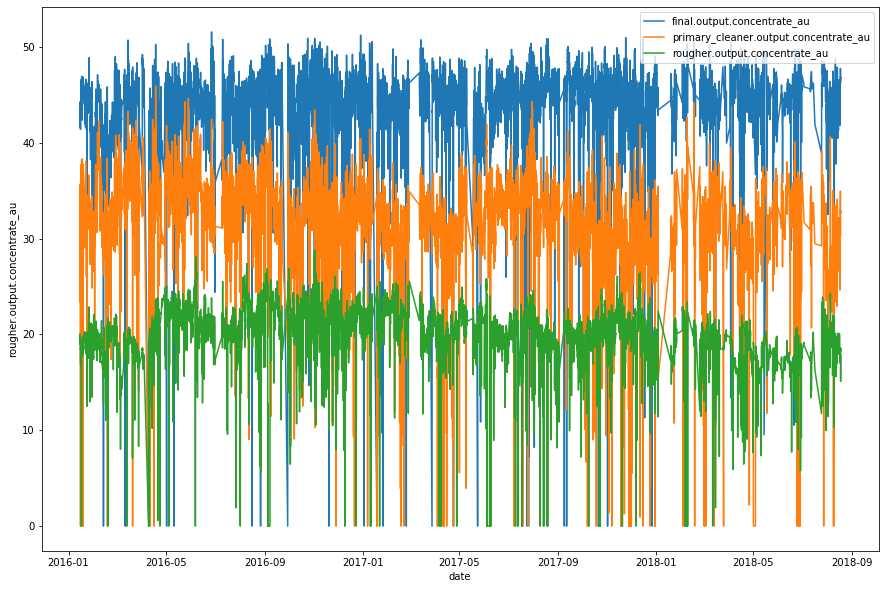

In [13]:
concentration_chart(full,'final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au')

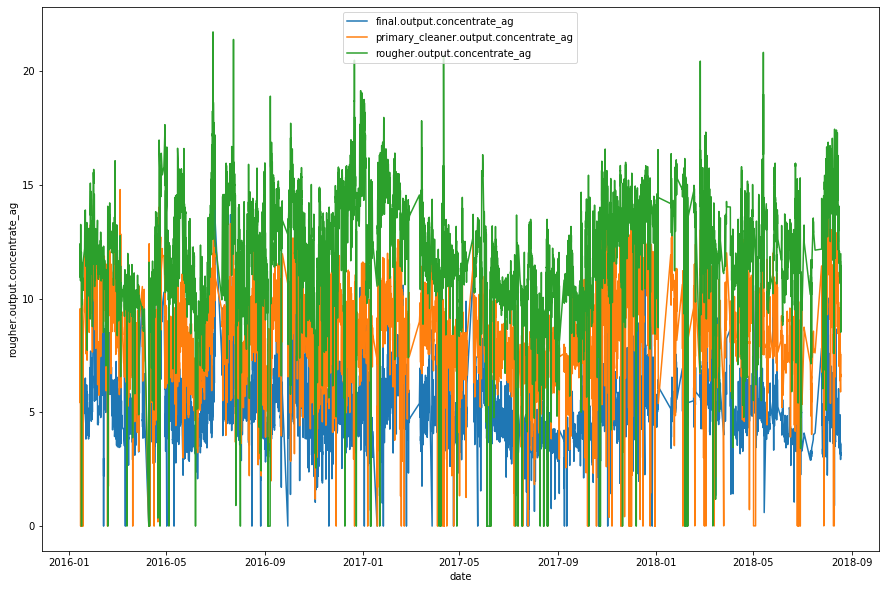

In [14]:
concentration_chart(full,'final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag')

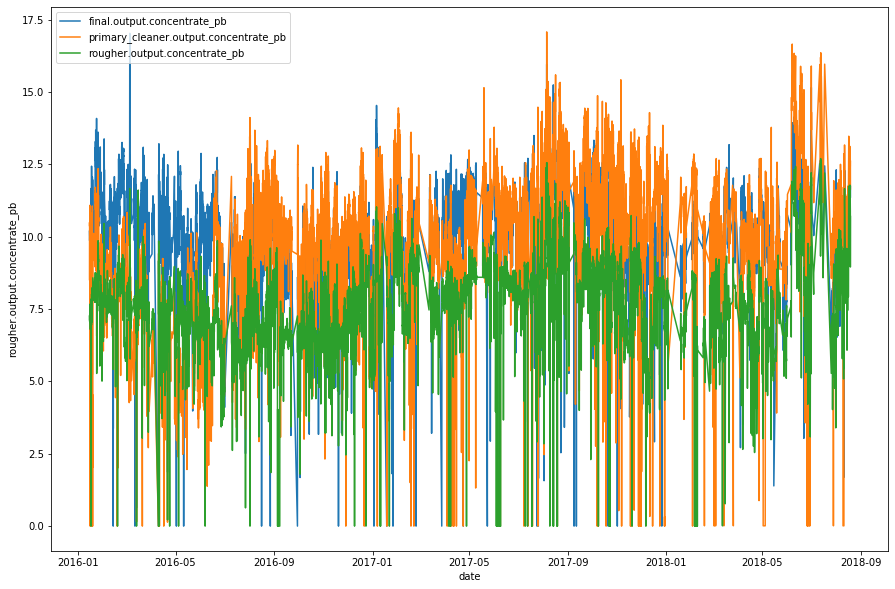

In [15]:
concentration_chart(full,'final.output.concentrate_pb','primary_cleaner.output.concentrate_pb','rougher.output.concentrate_pb')

### Промежуточный вывод
Как видно из приведенных выше графиков, концентрация золота в сырье возрастает после каждого этапа очистки, концентрация серебра уменьшается, а концентрация свинца остается практически неизменной. Стоит отметить, что данные при этом сильно зашумлены. На всех графиках наблюдается множество пиков и провалов. Разберем распределение концентраций более тщательно, для этого построим гистограммы.

In [16]:
#Объявляю функцию для автоматизации построения гистограмм
def concentration_hist(data, final_concentration, primary_concentration, rougher_concentration):
    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=3, ncols=1,
        figsize=(15, 15)
    )
    
    sns.distplot(data[final_concentration], kde=False, ax=ax1)
    ax1.set_title(final_concentration)
    
    sns.distplot(data[primary_concentration], kde=False, ax=ax2)
    ax2.set_title(primary_concentration)
    
    sns.distplot(data[rougher_concentration], kde=False, ax=ax3)
    ax3.set_title(rougher_concentration)
    
    plt.show()

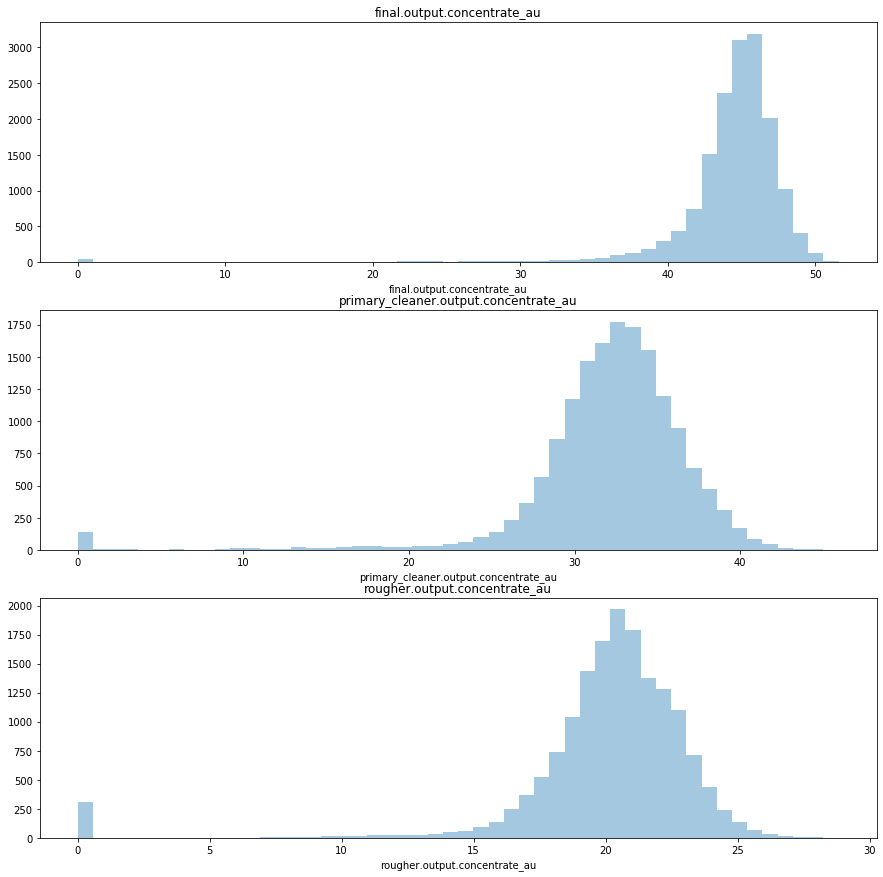

In [17]:
concentration_hist(full,'final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au')

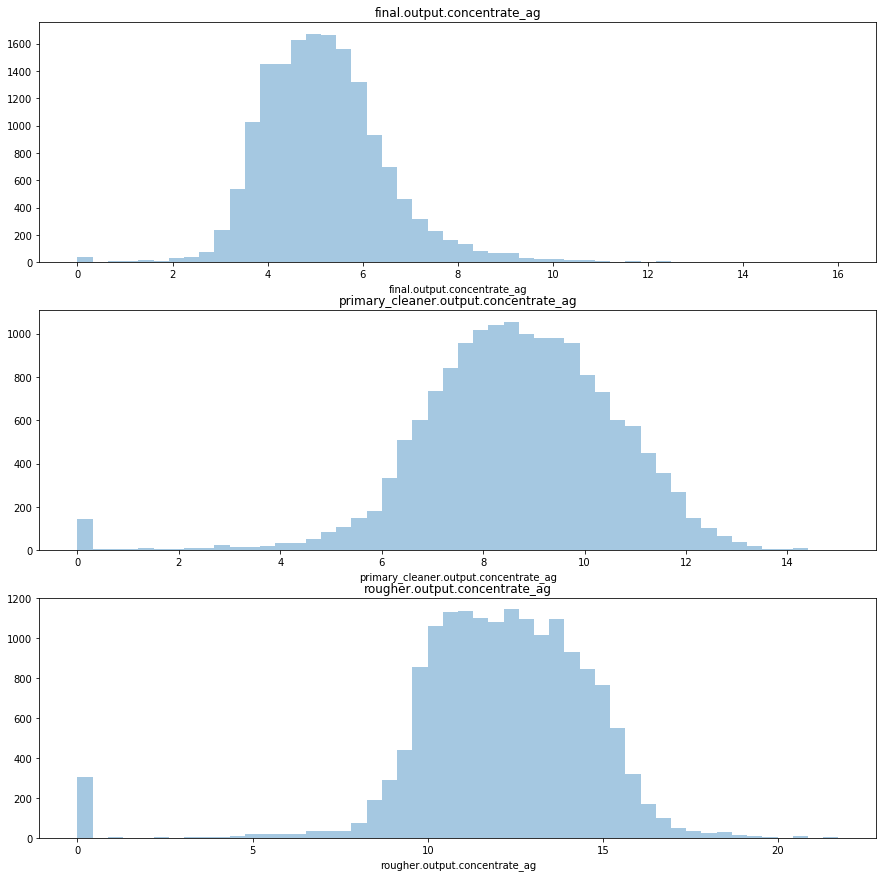

In [18]:
concentration_hist(full,'final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag')

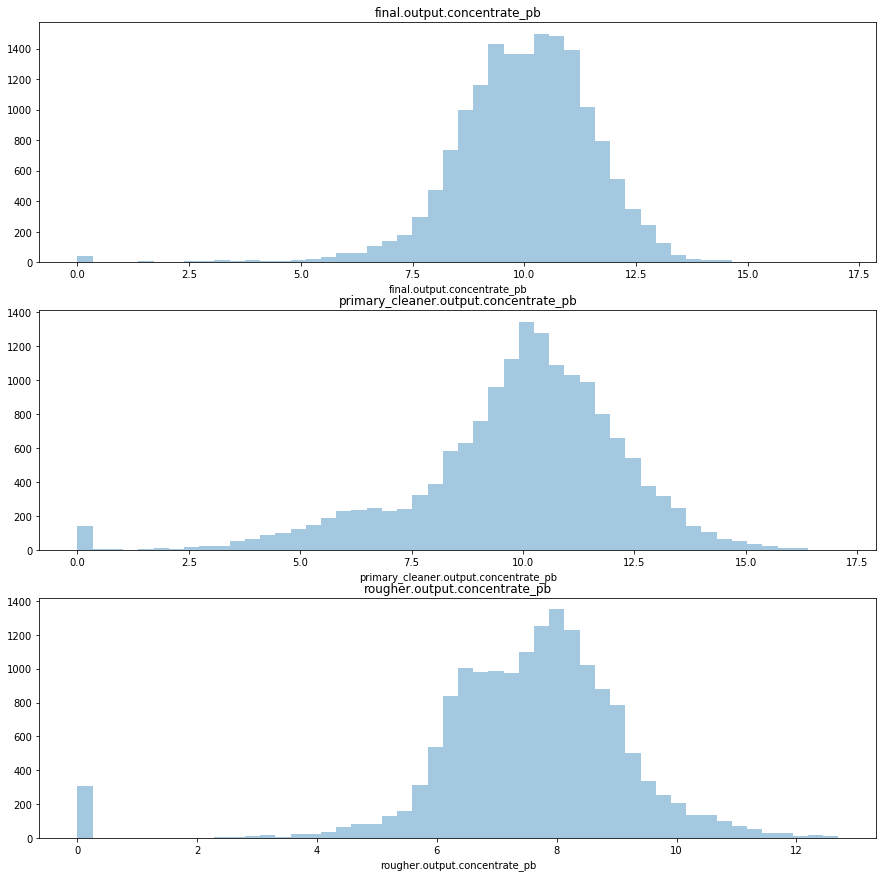

In [19]:
concentration_hist(full,'final.output.concentrate_pb','primary_cleaner.output.concentrate_pb','rougher.output.concentrate_pb')

### Промежуточный вывод
Гистограммы распределения четко выявили пики на нулевых концентрациях металлов, именно эти показатели создают "шум" на графиках. Появление данных с нулевыми концентрациями вероятнее всего вызвано простоями технологической линии, или выходом из строя даткиков, определяющих эти показатели.

###  2.2 Анализ распределения размеров гранул сырья<a id='step9'></a>
Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках необходимо для предсказания качества работы модели. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

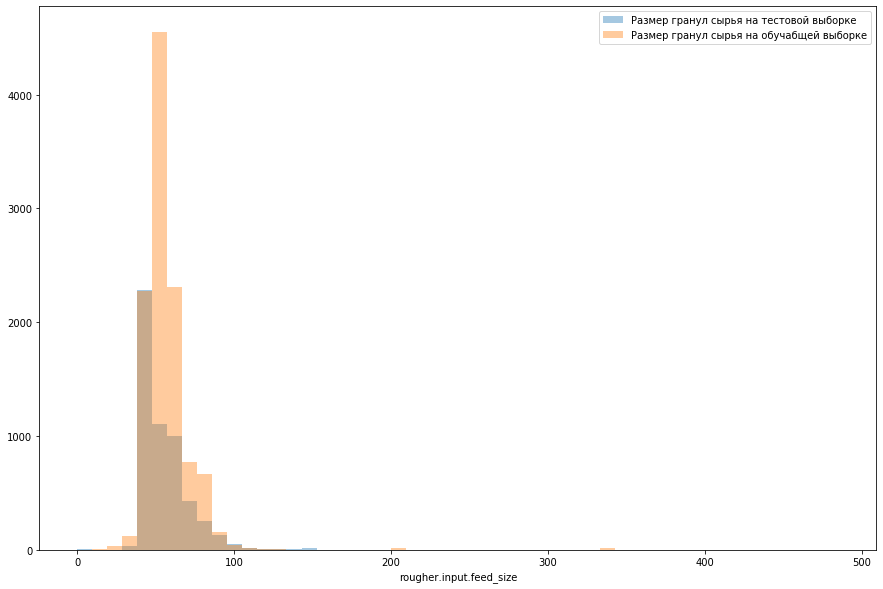

In [20]:
#Для сравнения размеров гранул сырья на обучеющей и на тестовой выборках строю гистограммы
plt.figure(figsize=(15, 10))
sns.distplot(test['rougher.input.feed_size'], kde=False, label='Размер гранул сырья на тестовой выборке')
sns.distplot(train['rougher.input.feed_size'], kde=False, label='Размер гранул сырья на обучабщей выборке')
plt.legend(ncol=1, loc='upper right')
plt.show()

### Промежуточный вывод
Гистограммы показали, что распределение размеров гранул на обучающей и на тествой выборке лежат в одном диапазоне. Следовательно оценка модели будет верной.

###  2.3 Анализ суммарной концентрации веществ на разных этапах очистки<a id='step10'></a>
Исследование суммарной концентрации всех веществ на разных стадиях необходимо для выявления аномалий. Эти аномалии мы уже видели на нрафиках выше.

In [21]:
#Считаю суммарные концентрации веществ на всех этапах очистки
full['final.output.concentrate_general'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol'] + full['final.output.concentrate_au']
full['primary_cleaner.output.concentrate_general'] = full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au']
full['rougher.output.concentrate_general'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']

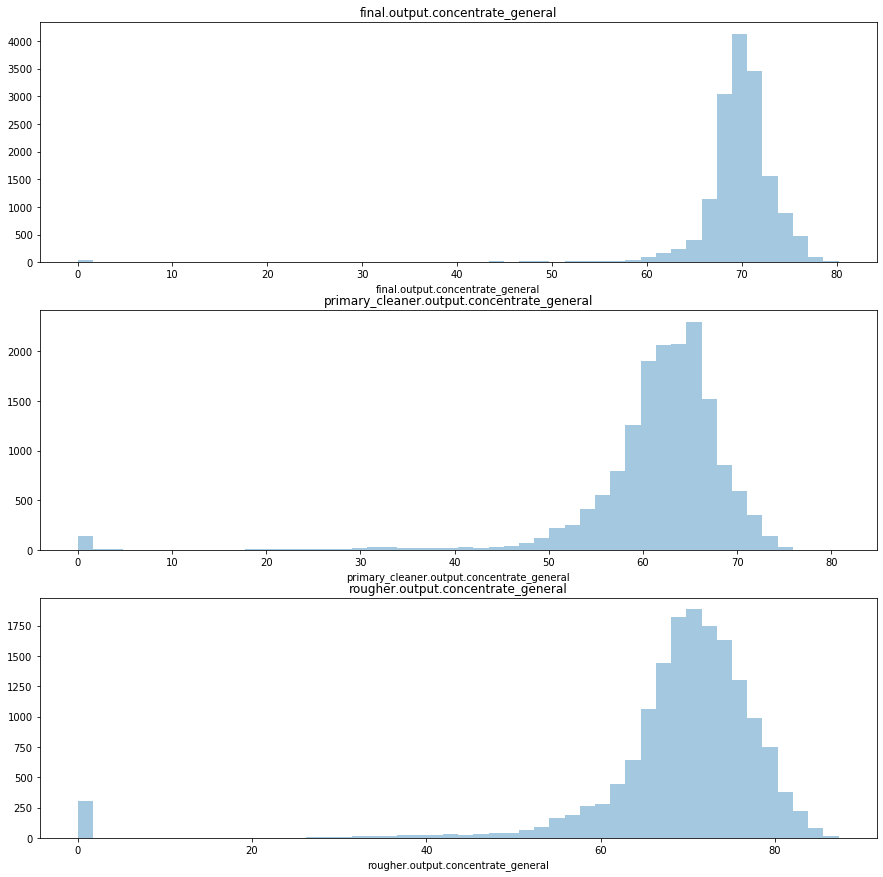

In [22]:
#Строю гистограммы распределения размеров гранул сырья на разных этапах
concentration_hist(full, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

In [23]:
#Объявляю функцию для построенеия диаграмм размаха
def concentration_boxplot(data, final_concentration, primary_concentration, rougher_concentration):
    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=3, ncols=1,
        figsize=(15, 15)
    )
    
    sns.boxplot(data[final_concentration], ax=ax1)
    ax1.set_title(final_concentration)
    
    sns.boxplot(data[primary_concentration], ax=ax2)
    ax2.set_title(primary_concentration)
    
    sns.boxplot(data[rougher_concentration], ax=ax3)
    ax3.set_title(rougher_concentration)
    
    plt.show()

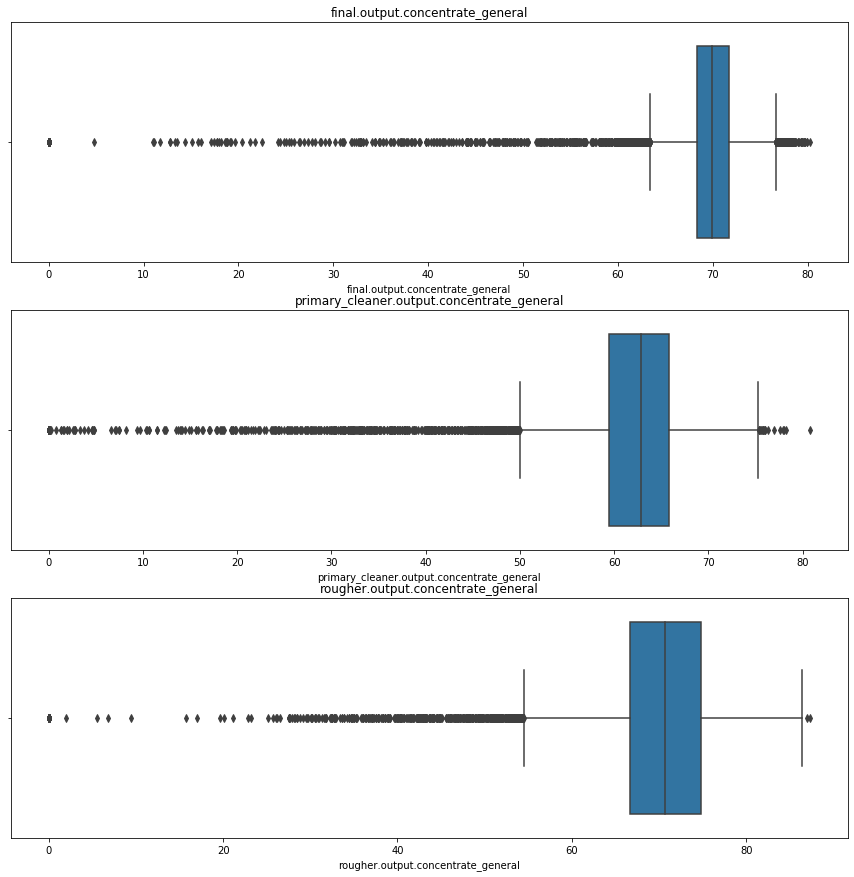

In [24]:
#Строю диаграммы размаха
concentration_boxplot(full, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

Посчитаны суммарные концентрации веществ на разных стадиях. Соответствующие столбцы добавлены в датасет **full**. Распределения суммарных концентраций также выявили аномальные значения. Для подготовки данных к обучению модели эти аномалии необходимо удалить, однако, я считаю неоправданным удалять все выбросы лежащие за пределами диаграммы размаха, поскольку есть риск значительно уменьшить объем данных, в связи с этим удалим часть данных, которые находятся ниже нижнего предела.

In [25]:
#Выделяю общие концентрации веществ после каждой стадии в отдельный датасет
general_concentration = full[['date', 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general']]
general_concentration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 4 columns):
date                                          16094 non-null datetime64[ns]
final.output.concentrate_general              16094 non-null float64
primary_cleaner.output.concentrate_general    16094 non-null float64
rougher.output.concentrate_general            16094 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 628.7 KB


In [26]:
#Объединяю датасет general_concentration с датасетами train и test, удаляю пропуски
train = pd.merge(general_concentration, train, on='date', how='outer')
train = train.dropna()

test = pd.merge(general_concentration, test, on='date', how='outer')
test = test.dropna()

In [27]:
#Получаю информацию об обновленных датасетах
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16093
Data columns (total 91 columns):
date                                                  11017 non-null datetime64[ns]
final.output.concentrate_general                      11017 non-null float64
primary_cleaner.output.concentrate_general            11017 non-null float64
rougher.output.concentrate_general                    11017 non-null float64
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5077 entries, 4213 to 13680
Data columns (total 56 columns):
date                                          5077 non-null datetime64[ns]
final.output.concentrate_general              5077 non-null float64
primary_cleaner.output.concentrate_general    5077 non-null float64
rougher.output.concentrate_general            5077 non-null float64
primary_cleaner.input.sulfate                 5077 non-null float64
primary_cleaner.input.depressant              5077 non-null float64
primary_cleaner.input.feed_size               5077 non-null float64
primary_cleaner.input.xanthate                5077 non-null float64
primary_cleaner.state.floatbank8_a_air        5077 non-null float64
primary_cleaner.state.floatbank8_a_level      5077 non-null float64
primary_cleaner.state.floatbank8_b_air        5077 non-null float64
primary_cleaner.state.floatbank8_b_level      5077 non-null float64
primary_cleaner.state.floatbank8_c_air        5077 non-null float6

In [29]:
#Удаляю аномальные значения
train = train.loc[(train['final.output.concentrate_general'] > 2) & 
                  #(train['final.output.concentrate_general'] < 76) &
                  (train['primary_cleaner.output.concentrate_general'] > 2) &
                  #(train['primary_cleaner.output.concentrate_general'] < 76) &
                  (train['rougher.output.concentrate_general'] > 2)] # &
                  #(train['rougher.output.concentrate_general'] < 85)]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10670 entries, 0 to 16093
Data columns (total 91 columns):
date                                                  10670 non-null datetime64[ns]
final.output.concentrate_general                      10670 non-null float64
primary_cleaner.output.concentrate_general            10670 non-null float64
rougher.output.concentrate_general                    10670 non-null float64
final.output.concentrate_ag                           10670 non-null float64
final.output.concentrate_pb                           10670 non-null float64
final.output.concentrate_sol                          10670 non-null float64
final.output.concentrate_au                           10670 non-null float64
final.output.recovery                                 10670 non-null float64
final.output.tail_ag                                  10670 non-null float64
final.output.tail_pb                                  10670 non-null float64
final.output.tail_sol                

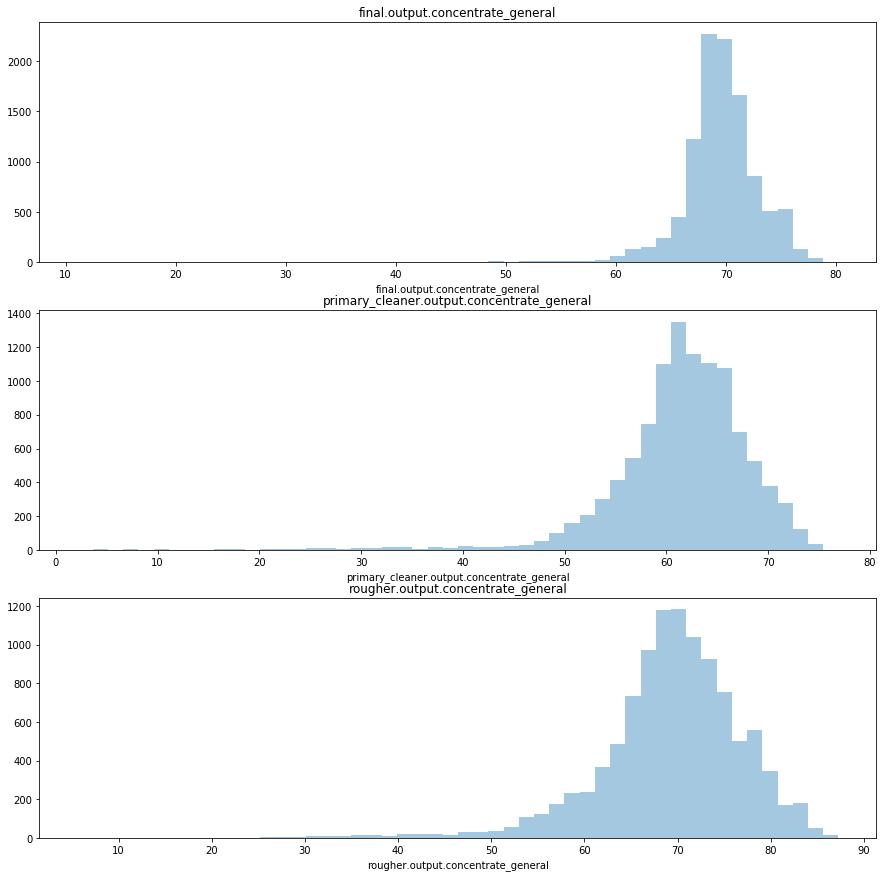

In [30]:
#Проверяю распределения
concentration_hist(train, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

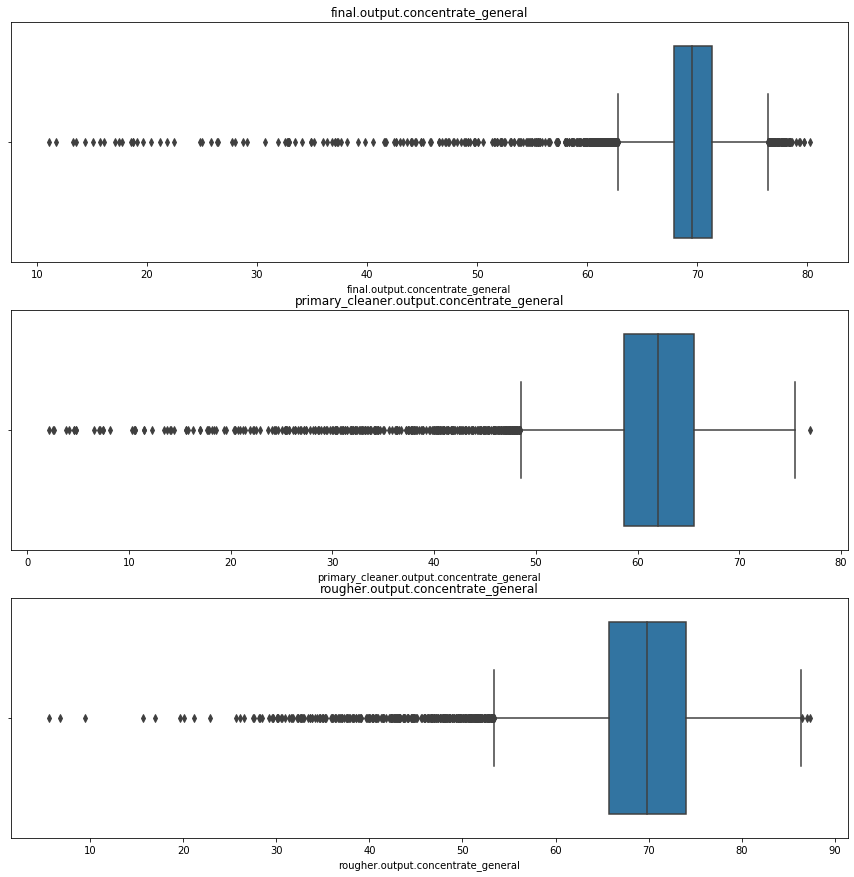

In [31]:
concentration_boxplot(train, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

In [32]:
#Удаляю аномальные значения
test = test.loc[(test['final.output.concentrate_general'] > 2) & 
                  (test['primary_cleaner.output.concentrate_general'] > 2) &
                  (test['rougher.output.concentrate_general'] > 2)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 4213 to 13680
Data columns (total 56 columns):
date                                          4940 non-null datetime64[ns]
final.output.concentrate_general              4940 non-null float64
primary_cleaner.output.concentrate_general    4940 non-null float64
rougher.output.concentrate_general            4940 non-null float64
primary_cleaner.input.sulfate                 4940 non-null float64
primary_cleaner.input.depressant              4940 non-null float64
primary_cleaner.input.feed_size               4940 non-null float64
primary_cleaner.input.xanthate                4940 non-null float64
primary_cleaner.state.floatbank8_a_air        4940 non-null float64
primary_cleaner.state.floatbank8_a_level      4940 non-null float64
primary_cleaner.state.floatbank8_b_air        4940 non-null float64
primary_cleaner.state.floatbank8_b_level      4940 non-null float64
primary_cleaner.state.floatbank8_c_air        4940 non-null float6

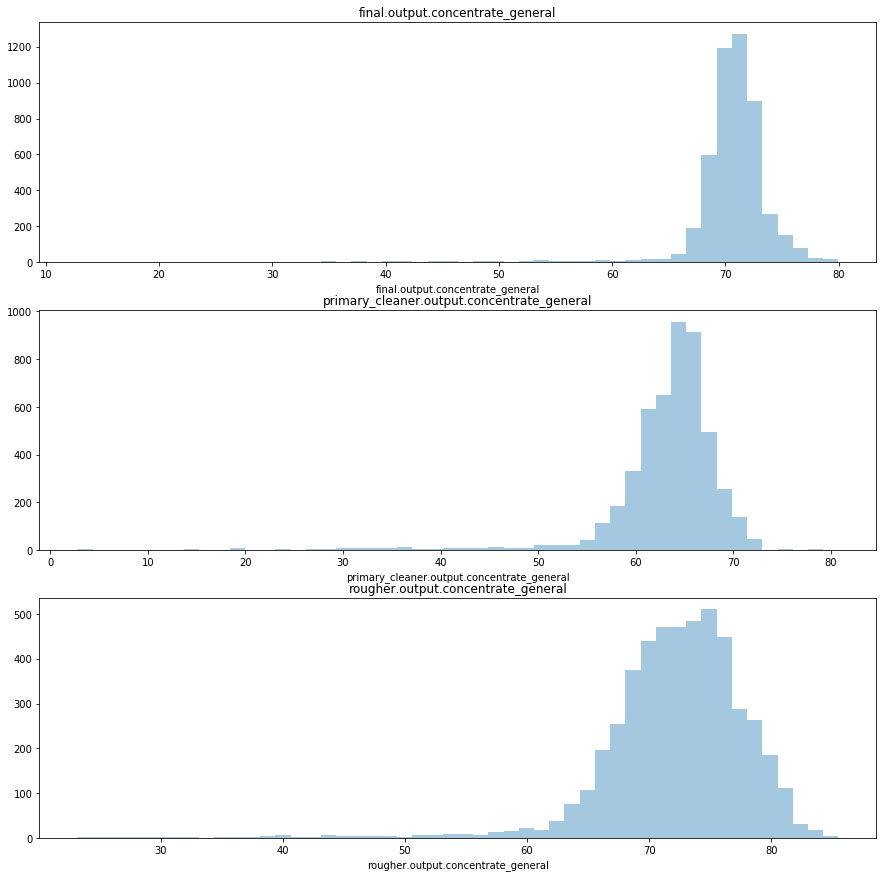

In [33]:
concentration_hist(test, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

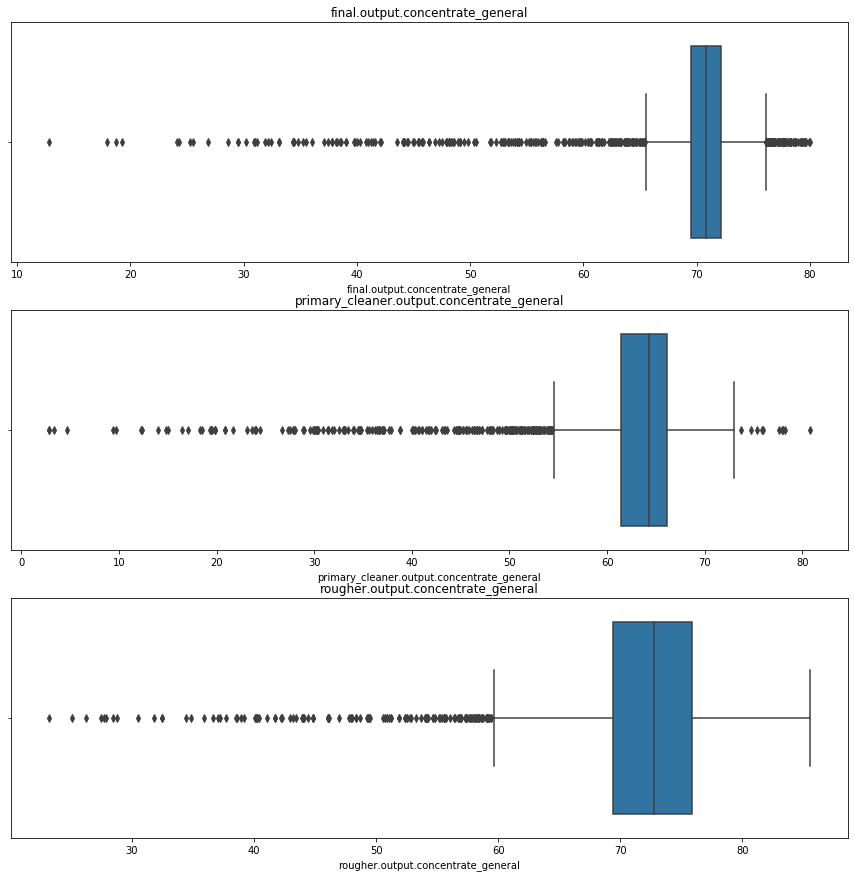

In [34]:
concentration_boxplot(test, 'final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general')

### Промежуточный вывод
На этом этапе выявлены и удалены аномальные значения. Решение об их удалении принято потому что такие данные могут ухудшить качество модели.

###  2.4 Вывод к этапу 2<a id='step11'></a>
Проведенный анализ данных  позволил выяснить зависимости концентраций золота, серебра и свинца в зависимости от этапа очистки. По графикам в целом отслеживается эффективность технологической линии, поскольку концентрация золота растет на каждом этапе.
<br>Сравнение размеров гранул на тестовой и тренировочной выборках показало, что размер гранул находится в одинаковых диапазонах. Следовательно качество модели при этом не пострадает.
<br>Исследование суммарных концентраций позволило выявить и удалить аномалии. 

## 3. Построение модели и определение метрик качества<a id='step12'></a>

###  3.1 Подготовка признаков и целевых признаков для обучения моделей<a id='step13'></a>
Для качественного обучения моделей проведем подготовку признаков и целевых признаков в датасетах **train** и **test**. 

In [35]:
#Добавляю целевые признаки в тестовый датасет (test)
full_target_features = full[['date', 'final.output.recovery', 'rougher.output.recovery']]
test = pd.merge(full_target_features, test, on='date', how='outer')
#Удаляю пропуски
test = test.dropna()
#Удаляю столбцы с суммарными концентрациями
test = test.drop(['final.output.concentrate_general', 'primary_cleaner.output.concentrate_general', 'rougher.output.concentrate_general'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 4213 to 13680
Data columns (total 55 columns):
date                                          4940 non-null datetime64[ns]
final.output.recovery                         4940 non-null float64
rougher.output.recovery                       4940 non-null float64
primary_cleaner.input.sulfate                 4940 non-null float64
primary_cleaner.input.depressant              4940 non-null float64
primary_cleaner.input.feed_size               4940 non-null float64
primary_cleaner.input.xanthate                4940 non-null float64
primary_cleaner.state.floatbank8_a_air        4940 non-null float64
primary_cleaner.state.floatbank8_a_level      4940 non-null float64
primary_cleaner.state.floatbank8_b_air        4940 non-null float64
primary_cleaner.state.floatbank8_b_level      4940 non-null float64
primary_cleaner.state.floatbank8_c_air        4940 non-null float64
primary_cleaner.state.floatbank8_c_level      4940 non-null float6

Подготовим датасеты для предсказания rougher.output.recovery. Для того, чтобы не произола **"утечка" целевого признака** мы воспользуемся только теми данными, которые нам известны на этапе *флотации*. Остальные признаки использовать не будем.

In [36]:
#Выбираю признаки для модели, предсказывающей rougher.output.recovery
rougher_fetures_list = []

for i in list(test.columns):
    if 'rougher' in i and 'recovery' not in i:
        rougher_fetures_list.append(i)
#Обучающий датасет признаков для rougher.output.recovery
train_rougher_features = train[rougher_fetures_list]
#Обучающий целевой признак для rougher.output.recovery
train_rougher_target = train['rougher.output.recovery']
train_rougher_features.info()
print()
print(len(train_rougher_target))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10670 entries, 0 to 16093
Data columns (total 22 columns):
rougher.input.feed_ag                 10670 non-null float64
rougher.input.feed_pb                 10670 non-null float64
rougher.input.feed_rate               10670 non-null float64
rougher.input.feed_size               10670 non-null float64
rougher.input.feed_sol                10670 non-null float64
rougher.input.feed_au                 10670 non-null float64
rougher.input.floatbank10_sulfate     10670 non-null float64
rougher.input.floatbank10_xanthate    10670 non-null float64
rougher.input.floatbank11_sulfate     10670 non-null float64
rougher.input.floatbank11_xanthate    10670 non-null float64
rougher.state.floatbank10_a_air       10670 non-null float64
rougher.state.floatbank10_a_level     10670 non-null float64
rougher.state.floatbank10_b_air       10670 non-null float64
rougher.state.floatbank10_b_level     10670 non-null float64
rougher.state.floatbank10_c_air      

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
да, в трайне должны быть только те столбцы, что и в тесте. ОК.

In [37]:
#Тестовый датасет признаков для rougher.output.recovery
test_rougher_features = test[rougher_fetures_list]
#Тестовый целевой признак для rougher.output.recovery
test_rougher_target = test['rougher.output.recovery']
test_rougher_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 4213 to 13680
Data columns (total 22 columns):
rougher.input.feed_ag                 4940 non-null float64
rougher.input.feed_pb                 4940 non-null float64
rougher.input.feed_rate               4940 non-null float64
rougher.input.feed_size               4940 non-null float64
rougher.input.feed_sol                4940 non-null float64
rougher.input.feed_au                 4940 non-null float64
rougher.input.floatbank10_sulfate     4940 non-null float64
rougher.input.floatbank10_xanthate    4940 non-null float64
rougher.input.floatbank11_sulfate     4940 non-null float64
rougher.input.floatbank11_xanthate    4940 non-null float64
rougher.state.floatbank10_a_air       4940 non-null float64
rougher.state.floatbank10_a_level     4940 non-null float64
rougher.state.floatbank10_b_air       4940 non-null float64
rougher.state.floatbank10_b_level     4940 non-null float64
rougher.state.floatbank10_c_air       4940 non-nu

Подготовим датасеты для предсказания final.output.recovery

In [38]:
#Выделяю признаки и целевые признаки для обучния моделей final.output.recovery
#Тестовый датасет признаков для final.output.recovery
test_final_features = test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
#Тестовый целевой признак для final.output.recovery
test_final_target = test['final.output.recovery']

final_features_list = list(test_final_features)
#Обучающий датасет признаков для final.output.recovery
train_final_features = train[final_features_list]
#Обучающий целевой признак для final.output.recovery
train_final_target = train['final.output.recovery']

In [39]:
test_final_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 4213 to 13680
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 4940 non-null float64
primary_cleaner.input.depressant              4940 non-null float64
primary_cleaner.input.feed_size               4940 non-null float64
primary_cleaner.input.xanthate                4940 non-null float64
primary_cleaner.state.floatbank8_a_air        4940 non-null float64
primary_cleaner.state.floatbank8_a_level      4940 non-null float64
primary_cleaner.state.floatbank8_b_air        4940 non-null float64
primary_cleaner.state.floatbank8_b_level      4940 non-null float64
primary_cleaner.state.floatbank8_c_air        4940 non-null float64
primary_cleaner.state.floatbank8_c_level      4940 non-null float64
primary_cleaner.state.floatbank8_d_air        4940 non-null float64
primary_cleaner.state.floatbank8_d_level      4940 non-null float64
rougher.input.feed_ag                         4940 non-null float64
rough

In [40]:
train_final_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10670 entries, 0 to 16093
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 10670 non-null float64
primary_cleaner.input.depressant              10670 non-null float64
primary_cleaner.input.feed_size               10670 non-null float64
primary_cleaner.input.xanthate                10670 non-null float64
primary_cleaner.state.floatbank8_a_air        10670 non-null float64
primary_cleaner.state.floatbank8_a_level      10670 non-null float64
primary_cleaner.state.floatbank8_b_air        10670 non-null float64
primary_cleaner.state.floatbank8_b_level      10670 non-null float64
primary_cleaner.state.floatbank8_c_air        10670 non-null float64
primary_cleaner.state.floatbank8_c_level      10670 non-null float64
primary_cleaner.state.floatbank8_d_air        10670 non-null float64
primary_cleaner.state.floatbank8_d_level      10670 non-null float64
rougher.input.feed_ag                         10670 non-null fl

In [41]:
from sklearn.preprocessing import StandardScaler #Импортирую StandardScaler из библиотеки sklearn

In [42]:
rougher_scaler = StandardScaler() 
rougher_scaler.fit(train_rougher_features) #Обучаю стандартизатор

final_scaler = StandardScaler() 
final_scaler.fit(train_final_features) #Обучаю стандартизатор

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
#Стандартизирую признаки
train_rougher_features = pd.DataFrame(rougher_scaler.transform(train_rougher_features))
test_rougher_features = pd.DataFrame(rougher_scaler.transform(test_rougher_features))

train_final_features = pd.DataFrame(final_scaler.transform(train_final_features))
test_final_features = pd.DataFrame(final_scaler.transform(test_final_features))

In [44]:
display(train_rougher_features.head())
print('________________________________')
display(test_rougher_features.head())
print('________________________________')
display(train_final_features.head())
print('________________________________')
display(test_final_features.head())

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.429894,-1.184624,0.487921,-0.091488,0.055245,-0.909556,-0.089880,0.131749,-0.137418,0.111888,...,1.569655,0.533383,1.415800,0.429277,1.921834,0.260927,1.770100,0.166749,2.231726,0.228029
1,-1.397406,-1.202327,0.507515,0.002395,-0.177738,-0.913804,-0.095153,0.129541,-0.083103,0.118428,...,1.556611,0.251179,1.406457,0.282668,1.930022,0.286696,1.741036,0.253766,2.133998,0.262508
2,-1.421295,-1.302106,0.560719,0.014549,-0.129551,-0.979124,-0.112449,0.319807,-0.108948,0.303814,...,1.548419,0.250159,1.402480,0.280287,1.926530,0.286686,1.740781,0.271428,2.137506,0.254779
3,-1.460422,-1.416329,0.701858,0.029327,0.067089,-1.116113,-0.211767,0.325566,-0.186579,0.296038,...,1.552593,0.238836,1.404156,0.281133,1.915594,0.283303,1.750545,0.269675,2.137024,0.268723
4,-1.451004,-1.651623,0.678733,-0.062120,-0.488111,-1.371240,-0.441626,0.321246,-0.435950,0.294415,...,1.553456,0.257732,1.405856,0.278751,1.926065,0.287539,1.753968,0.291518,2.142461,0.257051


________________________________


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.329628,1.958288,0.108751,0.286958,1.206426,2.232892,1.597721,0.276218,1.576586,0.251758,...,-0.472354,1.192806,-0.322361,1.252231,-0.140926,1.256824,-0.474069,1.226388,-0.510521,1.246113
1,2.280261,1.854539,0.112243,0.247704,1.022166,2.140197,1.624954,0.122865,1.620382,0.108505,...,-0.480118,1.177278,-0.323525,1.247731,-0.129504,1.248099,-0.471133,1.227135,-0.506797,1.102058
2,2.334893,1.761236,0.106777,0.506642,1.322090,2.236950,1.621531,-0.024504,1.615623,-0.035063,...,-0.485637,1.171383,-0.329968,1.219979,-0.133295,1.231795,-0.471558,1.231957,-0.506089,1.195293
3,1.940173,1.468864,-0.039260,0.137938,0.993969,2.287621,1.464138,-0.072860,1.456576,-0.083269,...,-0.463198,1.201181,-0.318698,1.245502,-0.135207,1.294993,-0.460447,1.209212,-0.503652,1.215393
4,1.366161,1.143138,0.091389,0.318647,1.040107,1.787355,0.464182,-0.136265,0.480384,-0.145074,...,-0.154901,1.185325,-0.042850,1.258883,0.118620,1.230135,-0.145108,1.236670,-0.510056,1.225342


________________________________


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.379664,0.239063,-0.263674,0.261688,-0.426832,-0.299871,-0.424467,-0.804386,-0.414476,-0.276380,...,-0.952671,-0.497690,-0.542048,-0.795163,-1.115052,-0.405111,-0.794237,-0.446015,-1.085882,-2.444385
1,-0.420404,0.288715,-0.263674,0.299728,-0.227138,-0.357783,-0.240939,-0.320915,-0.222278,-0.294925,...,-0.957098,-0.554661,-0.569726,-0.738933,-1.095629,-0.450469,-0.810386,-0.448682,-1.113392,-2.292186
2,-0.470799,0.590260,-0.263674,0.268545,-0.035022,-0.331420,-0.058013,-0.342603,-0.030897,-0.339392,...,-0.952999,-0.498311,-0.576719,-0.735641,-1.090215,-0.449472,-0.805431,-0.447133,-1.107942,-2.333415
3,-0.513958,0.591993,-0.263674,0.283519,-0.047034,-0.359144,-0.055973,-0.315395,-0.043401,-0.335329,...,-0.949124,-0.466878,-0.560644,-0.736643,-1.107404,-0.426852,-0.811651,-0.440857,-1.112098,-2.297438
4,-0.633218,0.766846,-0.263674,0.319443,-0.036660,-0.301711,-0.050144,-0.334286,-0.048716,-0.339909,...,-0.950785,-0.447631,-0.569256,-0.734320,-1.115039,-0.487460,-0.825788,-0.443258,-1.113699,-2.335158


________________________________


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.951744,1.677222,1.172721,0.306179,-1.567859,-0.338040,-1.564493,-0.322489,-1.516515,-0.334653,...,-1.312013,-0.409033,-1.298528,-0.738229,-1.453396,1.204370,-1.339965,-0.435617,1.171690,0.223459
1,2.079625,1.675552,1.172721,0.266367,-1.569398,-0.333154,-1.572649,-0.318351,-1.545595,-0.292782,...,-1.305778,-0.426037,-1.277348,-0.710733,-1.451394,-1.076524,-1.338886,-0.438613,0.868521,0.220693
2,2.075935,1.053992,0.665079,0.281616,-1.571549,-0.356720,-1.566623,-0.317952,-1.531433,-0.376036,...,-1.323044,-0.427392,-1.283663,-0.730558,-1.432112,-0.465875,-1.334415,-0.430605,0.864012,0.200505
3,2.078059,0.794396,0.411258,-0.080966,-1.563040,-0.298459,-1.577255,-0.301770,-1.516322,-0.267495,...,-1.310294,-0.419521,-1.287729,-0.708078,-1.461854,-0.467505,-1.329944,-0.433846,0.855750,0.248581
4,1.625839,0.402909,0.220893,-0.239480,-1.550555,-0.354974,-1.572099,-0.310351,-1.501290,-0.337691,...,-1.311687,-0.465540,-1.291484,-0.723415,-1.425815,-0.678669,-1.325474,-0.443354,0.865535,0.194629


### Промежуточный вывод
На этом этапе подготовлены датасеты для обучения моделей, определены признаки и целевые признаки для rougher.output.recovery и final.output.recovery. Полученые методом .info() данные подтверждают, что все датасеты имеют нужное количество колонок и стоблбцов.

###  3.2 Обучение моделей и оценка их качества кросс-валидацией<a id='step14'></a>
Исходя из условий задачи, нам необходимо спрогнозировать два показателя качества - после флотации (черновой концентрат) и финальный концентрат. Для этого выбераем модели **Дерево решений, Случайный лес, Линейная регрессия**.
<br>Обучим три модели на имеющихся признаках и выберем лучшую для каждого показателя.

In [45]:
#Объявляю функцию для расчета метрики sMAPE
def sMAPE(target, predict):
    return 1/len(target) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)

In [46]:
from sklearn.ensemble import RandomForestRegressor #Импортирую модель RandomForestRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor #Импортирую модель DecisionTreeRegressor из библиотеки sklearn
from sklearn.linear_model import LinearRegression #Импортирую модель LinearRegression из библиотеки sklearn
from sklearn.model_selection import cross_val_score #Импортирую функцию cross_val_score из библиотеки sklearn
from sklearn.model_selection import GridSearchCV #Импортирую функцию GridSearchCV из библиотеки sklearn
from sklearn.metrics import make_scorer #Импортирую функцию make_scorer из библиотеки sklearn

Подберем гиперпараметры и обучим модель случайного леса для чернового концентрата.

In [47]:
%%time
#Подбираю оптимальные гиперпараметры для обучения модели случайного леса
rougher_forest = RandomForestRegressor()

rougher_forest_parametrs = { 'n_estimators': range (5, 20, 5),
                             'max_depth': range (1, 8, 2),
                             'min_samples_leaf': range (1,6),
                             'min_samples_split': range (2,8,2) }

rougher_forest_grid = GridSearchCV(rougher_forest, rougher_forest_parametrs, cv=3)
rougher_forest_grid.fit(train_rougher_features, train_rougher_target)

rougher_forest_params = rougher_forest_grid.best_params_

print(rougher_forest_params)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}
CPU times: user 4min 4s, sys: 258 ms, total: 4min 5s
Wall time: 4min 9s


In [48]:
#rougher_forest_params = {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}

In [49]:
#Обучаю модель случайного леса на оптимальных гиперпараметрах
rougher_forest = RandomForestRegressor(random_state=12345,
                                       max_depth=rougher_forest_params['max_depth'],
                                       min_samples_leaf = rougher_forest_params['min_samples_leaf'],
                                       min_samples_split = rougher_forest_params['min_samples_split'],
                                       n_estimators = rougher_forest_params['n_estimators'])

rougher_forest.fit(train_rougher_features, train_rougher_target)
rougher_forest_predictions = rougher_forest.predict(test_rougher_features)

In [50]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

In [51]:
#Получаю результат обучения модели оценкой качества кросс-валидацией
#rougher_forest_cv_score = pd.Series(cross_val_score(rougher_forest, train_rougher_features, train_rougher_target, scoring = sMAPE_score, cv=6)).mean()
rougher_forest_cv_score = cross_val_score(rougher_forest, train_rougher_features, train_rougher_target, scoring = sMAPE_score, cv=6)
print('Качество модели случайного леса на кросс-валидации:', rougher_forest_cv_score)

Качество модели случайного леса на кросс-валидации: [-7.97193935 -8.43307563 -5.5513718  -4.72776282 -3.82486842 -6.20208357]


In [52]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=True)

In [53]:
#Получаю результат обучения модели оценкой качества кросс-валидацией
rougher_forest_cv_score = cross_val_score(rougher_forest, train_rougher_features, train_rougher_target, scoring = sMAPE_score, cv=6)
print('Качество модели случайного леса на кросс-валидации:', rougher_forest_cv_score)

Качество модели случайного леса на кросс-валидации: [7.97193935 8.43307563 5.5513718  4.72776282 3.82486842 6.20208357]


In [54]:
rougher_forest_cv_score = pd.Series(rougher_forest_cv_score).mean()
print('Среднее качество модели случайного леса на кросс-валидации:', rougher_forest_cv_score)

Среднее качество модели случайного леса на кросс-валидации: 6.118516933099827


Подберем гиперпараметры и обучим модель дерева решений для чернового концентрата.

In [55]:
%%time
#Подбираю оптимальные гиперпараметры для обучения модели дерева решений
rougher_tree = DecisionTreeRegressor()

rougher_tree_parametrs = { 'max_depth': range (1, 8, 2),
                          'min_samples_leaf': range (1,6),
                          'min_samples_split': range (2,8,2) }

rougher_tree_grid = GridSearchCV(rougher_tree, rougher_tree_parametrs, cv=3)
rougher_tree_grid.fit(train_rougher_features, train_rougher_target)

rougher_tree_params = rougher_tree_grid.best_params_

print(rougher_tree_params)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
CPU times: user 13.4 s, sys: 0 ns, total: 13.4 s
Wall time: 13.7 s


In [56]:
#Обучаю модель дерева решений на оптимальных гиперпараметрах
rougher_tree = DecisionTreeRegressor(random_state=12345,
                                       max_depth=rougher_tree_params['max_depth'],
                                       min_samples_leaf = rougher_tree_params['min_samples_leaf'],
                                       min_samples_split = rougher_tree_params['min_samples_split'])

rougher_tree.fit(train_rougher_features, train_rougher_target)
rougher_tree_predictions = rougher_tree.predict(test_rougher_features)

In [57]:
#Получаю результат обучения модели оценкой качества кросс-валидацией
rougher_tree_cv_score = pd.Series(cross_val_score(rougher_tree, train_rougher_features, train_rougher_target, scoring = sMAPE_score, cv=6)).mean()
print('Среднее качество модели дерева решений на кросс-валидации:', rougher_tree_cv_score)

Среднее качество модели дерева решений на кросс-валидации: 6.526397875972568


Обучим модель линейной регрессии для определения метрики качества предсказаний для чернового концентрата.

In [76]:
#Обучаю модель линейной регрессии
rougher_regression = LinearRegression()
rougher_regression.fit(train_rougher_features, train_rougher_target)
rougher_regression_cv_score = pd.Series(cross_val_score(rougher_regression, train_rougher_features, train_rougher_target, scoring = sMAPE_score, cv=6)).mean()
rougher_regression_predictions = rougher_regression.predict(test_rougher_features)

print('Среднее качество модели линейной регрессии на кросс-валидации:', rougher_regression_cv_score)

Среднее качество модели линейной регрессии на кросс-валидации: 5.77549908318317


### Промежуточный вывод
Наилучшего показателя метрики sMAPE среди трех обученных моделей удалось достичь у модели Линейной регрессии. Средний показатель на кросс-валидации равняется 5.77549908318317.

Подберем гиперпараметры и обучим модель случайного леса для финального концентрата.

In [59]:
%%time
#Подбираю оптимальные гиперпараметры для обучения модели случайного леса
final_forest = RandomForestRegressor()

final_forest_parametrs = { 'n_estimators': range (5, 30, 5),
                          'max_depth': range (1, 8, 2),
                          'min_samples_leaf': range (1,6),
                          'min_samples_split': range (2,8,2) }

final_forest_grid = GridSearchCV(final_forest, final_forest_parametrs, cv=3)
final_forest_grid.fit(train_final_features, train_final_target)

final_forest_params = final_forest_grid.best_params_

print(final_forest_params)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 15}
CPU times: user 22min 38s, sys: 1.11 s, total: 22min 39s
Wall time: 23min 3s


In [60]:
#final_forest_params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}

In [61]:
#Обучаю модель случайного леса на оптимальных гиперпараметрах
final_forest = RandomForestRegressor(random_state=12345,
                                       max_depth=final_forest_params['max_depth'],
                                       min_samples_leaf = final_forest_params['min_samples_leaf'],
                                       min_samples_split = final_forest_params['min_samples_split'],
                                       n_estimators = final_forest_params['n_estimators'])

final_forest.fit(train_final_features, train_final_target)
final_forest_predictions = final_forest.predict(test_final_features)

In [62]:
#Получаю результат обучения модели оценкой качества кросс-валидацией
final_forest_cv_score = pd.Series(cross_val_score(final_forest, train_final_features, train_final_target, scoring = sMAPE_score, cv=6)).mean()
print('Среднее качество модели случайного леса на кросс-валидации:', final_forest_cv_score)

Среднее качество модели случайного леса на кросс-валидации: 8.293264680557838


Подберем гиперпараметры и обучим модель дерева решений для финального концентрата.

In [63]:
%%time
#Подбираю оптимальные гиперпараметры для обучения модели дерева решений
final_tree = DecisionTreeRegressor()

final_tree_parametrs = { 'max_depth': range (1, 8, 2),
                          'min_samples_leaf': range (1,6),
                          'min_samples_split': range (2,8,2) }

final_tree_grid = GridSearchCV(final_tree, final_tree_parametrs, cv=3)
final_tree_grid.fit(train_final_features, train_final_target)

final_tree_params = final_tree_grid.best_params_

print(final_tree_params)

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
CPU times: user 38.5 s, sys: 24 ms, total: 38.5 s
Wall time: 39.1 s


In [72]:
#Обучаю модель дерева решений на оптимальных гиперпараметрах
final_tree = DecisionTreeRegressor(random_state=12345,
                                       max_depth=final_tree_params['max_depth'],
                                       min_samples_leaf = final_tree_params['min_samples_leaf'],
                                       min_samples_split = final_tree_params['min_samples_split'])

final_tree.fit(train_final_features, train_final_target)
final_tree_predictions = final_tree.predict(test_final_features)

In [65]:
#Получаю результат обучения модели оценкой качества кросс-валидацией
final_tree_cv_score = pd.Series(cross_val_score(final_tree, train_final_features, train_final_target, scoring = sMAPE_score, cv=6)).mean()
print('Среднее качество модели дерева решений на кросс-валидации:', final_tree_cv_score)

Среднее качество модели дерева решений на кросс-валидации: 8.10597622591652


Обучим модель линейной регрессии для определения метрики качества предсказаний для финального концентрата.

In [66]:
final_regression = LinearRegression()
final_regression.fit(train_final_features, train_final_target)
final_regression_cv_score = pd.Series(cross_val_score(final_regression, train_final_features, train_final_target, scoring = sMAPE_score, cv=6)).mean()
print('Среднее качество модели линейной регрессии на кросс-валидации:', final_regression_cv_score)

Среднее качество модели линейной регрессии на кросс-валидации: 8.989766183104303


### Промежуточный вывод
Наилучшего показателя среди трех обученных моделей удалось достичь у модели Случайного леса. Средний показатель метрики R2 на кросс-валидации равняется 0.0026515688671644258. Значение этой метрики близкое к нулю указывает на недостаточную точность модели.

###  3.3 Проверка моделей на адекватность<a id='step15'></a>

Для проверки моделей на адекватность подготовлю списки медианных значений для коэффициента восстановления для ченового концентрата и для финального концентрата.

In [67]:
#Объявляю функцию для расчета метрики sMAPE
def smape(target, predict):
    return 1/len(target) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)

In [68]:
#Объявляю константные списки
rougher_model_check_list = [train_rougher_target.median() for i in range(0, len(train_rougher_target))]
final_model_check_list = [train_final_target.median() for i in range(0, len(train_final_target))]

In [69]:
print('sMAPE для константной модели чернового концентрата', smape(train_rougher_target, rougher_model_check_list))
print('sMAPE для константной модели финального концентрата', smape(train_final_target, final_model_check_list))

sMAPE для константной модели чернового концентрата 6.866920677897271
sMAPE для константной модели финального концентрата 8.964379824651491


In [73]:
columns = ['Этап', 'Средняя sMAPE на кросс-валидации', 'sMAPE на константной модели']
rougher = ['Черновой концентрат', 
        rougher_regression_cv_score, 
        smape(train_rougher_target, rougher_model_check_list)
]

final = ['Финальный концентрат',
          final_forest_cv_score,
          smape(train_final_target, final_model_check_list)
]


table = pd.DataFrame([rougher, final], columns = columns)
display(table)

,Этап,Средняя sMAPE на кросс-валидации,sMAPE на константной модели
0,Черновой концентрат,5.775499,6.866921
1,Финальный концентрат,8.293265,8.964380


###  3.4 Расчет итоговой метрики sMAPE<a id='step16'></a>
Исходя из условий задачи, нам необходимо спрогнозировать два показателя качества - после флотации (черновой концентрат) и финальный концентрат. Для этого выбераем модели **Дерево решений, Случайный лес, Линейная регрессия**.
<br>Обучим три модели на имеющихся признаках и выберем лучшую для каждого показателя.

Рассчитаем Итоговую метрику sMAPE для всей технологической линии. Для чернового концентрата используем модель линейной регрессии, а для финального концентрата модель случайного леса. 

In [74]:
#Объявляю функцию для расчета итоговой метрики sMAPE
def summary_smape(test_rougher_target, rougher_model_predict, test_final_target, final_model_predict):
    return 0.25*smape(test_rougher_target, rougher_model_predict) + 0.75*smape(test_final_target, final_model_predict)

In [79]:
summary_smape_test = summary_smape(test_rougher_target, rougher_regression_predictions, test_final_target, final_forest_predictions)
print(summary_smape_test)

7.128166179522838


Рассчитаем Итоговую константную метрику sMAPE для всей технологической линии

In [80]:
#Объявляю константные списки
rougher_model_check_list_1 = [test_rougher_target.median() for i in range(0, len(test_rougher_target))]
final_model_check_list_1 = [test_final_target.median() for i in range(0, len(test_final_target))]

summary_smape_test_const = 0.25*smape(test_rougher_target, rougher_model_check_list_1) + 0.75*smape(test_final_target, final_model_check_list_1)
print(summary_smape_test_const)

6.366224806475415


In [81]:
print('Разница между Итоговыми sMAPE моделей и Итоговыми константными sMAPE:', summary_smape_test - summary_smape_test_const, '%')

Разница между Итоговыми sMAPE моделей и Итоговыми константными sMAPE: 0.7619413730474225 %


###  3.5 Вывод к этапу 3<a id='step17'></a>
На этпе 3 были подготовлены для обучения и проверки моделей в общей сложности 4 датасета - 2 тренировочных (для чернового и для финального концентрата) и 2 тестовых (аналогично). Дополнительно выделено 4 целевых признака - - 2 тренировочных (для чернового и для финального концентрата) и 2 тестовых (аналогично). Затем с помощью функции StandardScaler проведена стандартизация признаков во всех датасетах, поскольку исходные данные имели сильно-различающиеся диапазоны.

Обучение моделей и проверка их на кросс-валидации позволила определить лучшие для этого модели. В первом случае ей оказалась линейная регрессия, а во втором случайный лес. Подбор оптимальных параметров осуществлялся с помощью функции GridSearchCV. Средний показатель метрики sMAPE модели для **чернового концентрата** на кросс-валидации равняется 5.775499. Средний показатель метрики sMAPE модели для **финального концентрата** на кросс-валидации равняется 8.293265

Финальным шагом в этапе 3 стало вычисление итоговой метрики sMAPE для обоих моделей по формуле. 

$ sMAPE(General) = 0.25 * sMAPE(Rougher) + 0.75 * sMAPE(Final) $

<br>Она достигла 7.128%, константная модель на тестовой выборке показала результат 6.366%. Разница между метриками составила 0.762%, следовательно обученные модели несколько отстают по качеству предсказаний.

## 4. Общий вывод<a id='step18'></a>

На первом этапе проедена загрузка данных, изучение общей информации и подготовка данных.
<br>Для анализа данных и построения модели предоставлены 3 датасета, отражающие показатели качества очистки сырья в виде золотоносной руды и некоторые характеристики работы технологического оборудования. Датасет **full** состоит из 87 столбцов с данными и 22716 строк, датасет **train** состоит из 87 столбцов с данными и 16859 строк, датасет **test** состоит из 53 столбцов с данными и 5855 строк. Во всех датасетах имеются пропуски, которые вероятнее всего вызваны неисправностями контролирующих датчиков или же простоями технологического оборудования.

Проверка достоверности значений в столбце *'rougher.output.recovery'* показала что **MAE** между исходным и и рассчетными показателями доказала, что исходные показатели в столлбце *'rougher.output.recovery'* рассчитаны верно.

Предобработка данных заключалась в изменении формата данных в столце *'date'* и удаление пропусков во всех трех датасетах.

Проведенный анализ данных  позволил выяснить зависимости концентраций золота, серебра и свинца в зависимости от этапа очистки. По графикам в целом отслеживается эффективность технологической линии, поскольку концентрация золота растет на каждом этапе.
<br>Сравнение размеров гранул на тестовой и тренировочной выборках показало, что размер гранул находится в одинаковых диапазонах. Следовательно качество модели при этом не пострадает.
<br>Исследование суммарных концентраций позволило выявить и удалить аномалии, которые явно выбивались из 1,5 межквартильного интервала на диаграммах размаха.

На этпе 3 были подготовлены для обучения и проверки моделей в общей сложности 4 датасета - 2 тренировочных (для чернового и для финального концентрата) и 2 тестовых (аналогично). Дополнительно выделено 4 целевых признака - - 2 тренировочных (для чернового и для финального концентрата) и 2 тестовых (аналогично). Затем с помощью функции StandardScaler проведена стандартизация признаков во всех датасетах, поскольку исходные данные имели сильно-различающиеся диапазоны.

Обучение моделей и проверка их на кросс-валидации позволила определить лучшие для этого модели. В первом случае ей оказалась линейная регрессия, а во втором случайный лес. Подбор оптимальных параметров осуществлялся с помощью функции GridSearchCV. Средний показатель метрики sMAPE модели для **чернового концентрата** на кросс-валидации равняется 5.775499. Средний показатель метрики sMAPE модели для **финального концентрата** на кросс-валидации равняется 8.293265

Финальным шагом в этапе 3 стало вычисление итоговой метрики sMAPE для обоих моделей по формуле. 

$ sMAPE(General) = 0.25 * sMAPE(Rougher) + 0.75 * sMAPE(Final) $

<br>Она достигла 7.128%, константная модель на тестовой выборке показала результат 6.366%. Разница между метриками составила 0.762%, следовательно обученные модели несколько отстают по качеству предсказаний.